<a href="https://colab.research.google.com/github/NJena404/Cancer_clinical_trial/blob/main/cancer_clinical_trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/cancer_clinical_trials.csv')

In [3]:
df.sample(10)

,study,condition,qualification
16987,study interventions are Erlotinib Hydrochloride,pancreatic cancer diagnosis and radiographic ...,0.0
15451,study interventions are Immunoglobulins,stage iv midline lethal granuloma of the para...,0.0
4722,study interventions are Carboplatin,breast cancer diagnosis and adequate renal fu...,0.0
703,study interventions are Albumin-Bound Paclitaxel,recurrent colon cancer diagnosis and karnofsk...,0.0
7522,study interventions are Panobinostat,patients with radiographically typical dipg d...,0.0
712,study interventions are Mycophenolate mofetil,stage iv adult diffuse small cleaved cell lym...,0.0
12835,study interventions are Paclitaxel,metastatic breast cancer diagnosis and female...,0.0
1180,study interventions are Staurosporine,recurrent small cell lung cancer diagnosis an...,0.0
5323,study interventions are Maleic acid,stage iiic rectal cancer diagnosis and platel...,0.0
3872,study interventions are Gemcitabine,recurrent uterine corpus carcinoma diagnosis ...,0.0


In [5]:
df.shape

(18592, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18592 entries, 0 to 18591
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study          18592 non-null  object 
 1   condition      18592 non-null  object 
 2   qualification  18591 non-null  float64
dtypes: float64(1), object(2)
memory usage: 435.9+ KB


In [8]:
df.condition.value_counts().sort_values()

 ovarian endometrioid adenocarcinoma diagnosis and ww cc du manuals_pdf surgma_df eleven two two thousand and nine eight sixteen two thousand and ten                         1
 testicular choriocarcinoma and embryonal carcinoma diagnosis and at least one week since prior growth factors two weeks for pegfilgrastim                                    1
 metastatic cholangiocarcinoma diagnosis and greater than or equal to eighteen years of age and less than or equal to seventy years of age                                    1
 stage iii melanoma diagnosis and cyclosporine                                                                                                                                1
 recurrent melanoma diagnosis and fertile patients must use effective contraception during and for greater_than equal_than six months after completion of study treatment     1
                                                                                                                        

In [15]:
df.study.value_counts()

study interventions are Antibodies, Monoclonal                                  567
study interventions are Antibodies                                              444
study interventions are Cyclophosphamide                                        430
study interventions are Albumin-Bound Paclitaxel                                400
study interventions are Paclitaxel                                              395
                                                                               ... 
study interventions are wild-type reovirus                                        1
study interventions are musculoskeletal complications management/prevention       1
study interventions are hand sewn                                                 1
study interventions are Genz-644282 (21-day dosing schedule)                      1
study interventions are high-intensity focused ultrasound ablation                1
Name: study, Length: 1937, dtype: int64

In [14]:
df.condition.value_counts()

 lymphoma diagnosis and not specified                                                                                                                                                42
 lymphoma diagnosis and prior concurrent therapy                                                                                                                                     20
 lymphoma diagnosis and disease characteristics                                                                                                                                      20
 breast cancer diagnosis and not specified                                                                                                                                           19
 lymphoma diagnosis and patient characteristics                                                                                                                                      15
                                                                                

In [16]:
clintrial_lymphoma=df.loc[df.condition.str.contains('\w*lymphoma')]

In [17]:
clintrial_lymphoma.shape

(4393, 5)

**There are nearly 230,000 trials of lymphoma! Let see breast cancer?**

In [18]:
clintrial_breast=df.loc[df.condition.str.contains('.*reast')]

In [19]:
clintrial_breast.shape

(1637, 5)

**There are nearly 230,000 trials of breast cancer**

In [20]:
clintrial_lymphoma['study'].value_counts()

study interventions are Fludarabine                      216
study interventions are Rituximab                        198
study interventions are Cyclophosphamide                 174
study interventions are Fludarabine phosphate            173
study interventions are Mycophenolic Acid                160
                                                        ... 
study interventions are Muromonab-CD3                      1
study interventions are Methadone                          1
study interventions are Questionnaire Administration       1
study interventions are Citric Acid                        1
study interventions are Triptorelin Pamoate                1
Name: study, Length: 384, dtype: int64

The most popular treatment is Fludarabine, different from the total cancer dataset.

In [22]:
clintrial_lymphoma['words'] = clintrial_lymphoma.condition.str.split(' ')

In [23]:
clintrial_lymphoma.head(3)

,study,condition,qualification,lymphoma,breast_cancer,words
7,study interventions are Bendamustine Hydrochlo...,diffuse large cell lymphoma diagnosis and no ...,0.0,True,False,"[, diffuse, large, cell, lymphoma, diagnosis, ..."
13,study interventions are Prednisone,testicular lymphoma diagnosis and bulky disea...,0.0,True,False,"[, testicular, lymphoma, diagnosis, and, bulky..."
15,study interventions are Fludarabine,natural_killer cell lymphoblastic leukemia ly...,0.0,True,False,"[, natural_killer, cell, lymphoblastic, leukem..."


In [25]:
#Now we have all the words singled out to count.
rows = list()
for row in clintrial_lymphoma[['study', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.study, word))

words = pd.DataFrame(rows, columns=['study', 'word'])

In [26]:
words.head(10)

,study,word
0,study interventions are Bendamustine Hydrochlo...,
1,study interventions are Bendamustine Hydrochlo...,diffuse
2,study interventions are Bendamustine Hydrochlo...,large
3,study interventions are Bendamustine Hydrochlo...,cell
4,study interventions are Bendamustine Hydrochlo...,lymphoma
5,study interventions are Bendamustine Hydrochlo...,diagnosis
6,study interventions are Bendamustine Hydrochlo...,and
7,study interventions are Bendamustine Hydrochlo...,no
8,study interventions are Bendamustine Hydrochlo...,previous
9,study interventions are Bendamustine Hydrochlo...,treatment


In [27]:
words['word'] = words.word.str.lower()

In [29]:
words['word'].value_counts().head(50)

and             5347
                4389
diagnosis       4328
lymphoma        4323
cell            1857
of              1703
or              1682
stage           1239
the             1148
to              1017
recurrent       1004
adult            898
must             789
patients         773
for              748
one              735
with             729
be               701
greater_than     652
have             637
grade            630
large            622
hodgkin          621
two              565
at               559
follicular       545
diffuse          518
in               515
less_than        503
no               474
disease          472
childhood        453
equal_than       444
therapy          423
prior            416
iii              409
small            405
three            404
non              383
ii               378
iv               375
not              369
are              325
donor            319
leukemia         313
doc              308
is               290
zone         

From the list, we can see most of them are useless, like 'and', 'the'...but some are very important and informative for cancer treatment, like 'recurrent', 'stage_ii', 'stage_iii', 'follicular' and 'diffuse'.

So let's take a look at the relationship between keywords and 'study'

First let's make some columns to store the keywords information.

In [30]:
clintrial_lymphoma['recurrent'] = pd.np.where(clintrial_lymphoma.condition.str.contains("\w*recurrent"), "recurrent","no")

In [32]:
clintrial_lymphoma.sample(10)

,study,condition,qualification,lymphoma,breast_cancer,words,recurrent
12367,study interventions are Fludarabine,recurrent childhood hodgkin lymphoma diagnosi...,0.0,True,False,"[, recurrent, childhood, hodgkin, lymphoma, di...",recurrent
5043,study interventions are Rituximab,lymphoma diagnosis and unilateral bone marrow...,0.0,True,False,"[, lymphoma, diagnosis, and, unilateral, bone,...",no
3619,study interventions are Antilymphocyte Serum,lymphoma diagnosis and not specified,0.0,True,False,"[, lymphoma, diagnosis, and, not, specified]",no
8494,study interventions are Imatinib Mesylate,stage iv adult burkitt lymphoma diagnosis and...,0.0,True,False,"[, stage, iv, adult, burkitt, lymphoma, diagno...",no
9780,study interventions are Rituximab,stage ii diffuse large cell lymphoma diagnosi...,0.0,True,False,"[, stage, ii, diffuse, large, cell, lymphoma, ...",no
4693,study interventions are Melphalan,recurrent cutaneous cell non hodgkin lymphoma...,0.0,True,False,"[, recurrent, cutaneous, cell, non, hodgkin, l...",recurrent
10640,study interventions are pharmacological study,recurrent mantle cell lymphoma diagnosis and ...,0.0,True,False,"[, recurrent, mantle, cell, lymphoma, diagnosi...",recurrent
9380,study interventions are Prednisolone hemisucci...,lymphoma diagnosis and not specified,0.0,True,False,"[, lymphoma, diagnosis, and, not, specified]",no
2868,study interventions are Prednisone,plasmablastic lymphoma diagnosis and females ...,0.0,True,False,"[, plasmablastic, lymphoma, diagnosis, and, fe...",no
10054,study interventions are Aldesleukin,stage iii adult lymphoblastic lymphoma diagno...,0.0,True,False,"[, stage, iii, adult, lymphoblastic, lymphoma,...",no


In [33]:
clintrial_lymphoma['stage_ii'] = pd.np.where(clintrial_lymphoma.condition.str.contains("\w*stage ii"), "stage_ii","no")

In [34]:
clintrial_lymphoma['stage_iii'] = pd.np.where(clintrial_lymphoma.condition.str.contains("\w*stage iii"), "stage_iii","no")

In [35]:
clintrial_lymphoma['stage_iv'] = pd.np.where(clintrial_lymphoma.condition.str.contains("\w*stage iv"), "stage_iv","no")

In [36]:
clintrial_lymphoma['follicular'] = pd.np.where(clintrial_lymphoma.condition.str.contains("\w*follicular"), "follicular","no")

In [37]:
clintrial_lymphoma['diffuse'] = pd.np.where(clintrial_lymphoma.condition.str.contains("\w*diffuse"), "diffuse","no")

In [38]:
clintrial_lymphoma['hodgkin'] = pd.np.where(clintrial_lymphoma.condition.str.contains("\w*hodgkin"), "hodgkin","no")

In [39]:
clintrial_lymphoma.sample(50)

,study,condition,qualification,lymphoma,breast_cancer,words,recurrent,stage_ii,stage_iii,stage_iv,follicular,diffuse,hodgkin
5077,study interventions are Cyclophosphamide,lymphoma cell diagnosis and total bilirubin l...,0.0,True,False,"[, lymphoma, cell, diagnosis, and, total, bili...",no,no,no,no,no,no,no
16566,study interventions are Etoposide,stage marginal zone lymphoma diagnosis and pa...,0.0,True,False,"[, stage, marginal, zone, lymphoma, diagnosis,...",no,no,no,no,no,no,no
7768,study interventions are Everolimus,stage ii small lymphocytic lymphoma diagnosis...,0.0,True,False,"[, stage, ii, small, lymphocytic, lymphoma, di...",no,stage_ii,no,no,no,no,no
17733,study interventions are Mycophenolic Acid,recurrent marginal zone lymphoma diagnosis an...,0.0,True,False,"[, recurrent, marginal, zone, lymphoma, diagno...",recurrent,no,no,no,no,no,no
10116,study interventions are Fludarabine,recurrent grade one follicular lymphoma diagn...,0.0,True,False,"[, recurrent, grade, one, follicular, lymphoma...",recurrent,no,no,no,follicular,no,no
2779,study interventions are Molecular Mechanisms o...,anaplastic large cell lymphoma diagnosis and ...,0.0,True,False,"[, anaplastic, large, cell, lymphoma, diagnosi...",no,no,no,no,no,no,no
13303,study interventions are Methotrexate,stage iii childhood large cell lymphoma diagn...,0.0,True,False,"[, stage, iii, childhood, large, cell, lymphom...",no,stage_ii,stage_iii,no,no,no,no
8614,study interventions are Vorinostat,stage iv adult diffuse large cell lymphoma di...,0.0,True,False,"[, stage, iv, adult, diffuse, large, cell, lym...",no,no,no,stage_iv,no,diffuse,no
17855,study interventions are Ganciclovir,stage iv grade three follicular lymphoma diag...,0.0,True,False,"[, stage, iv, grade, three, follicular, lympho...",no,no,no,stage_iv,follicular,no,no
12900,study interventions are Mycophenolic Acid,recurrent childhood small noncleaved cell lym...,0.0,True,False,"[, recurrent, childhood, small, noncleaved, ce...",recurrent,no,no,no,no,no,no


In [40]:
clintrial_lymphoma_select=clintrial_lymphoma.drop([ 'words'], axis=1)

In [41]:
var = clintrial_lymphoma_select.groupby(['study']).qualification.value_counts()

In [42]:
var.shape

(384,)

In [43]:
var.head(10)

study                                         qualification
study interventions are 10-deazaaminopterin   0.0               2
study interventions are 6-Mercaptopurine      0.0               9
study interventions are ADCT-402              0.0               1
study interventions are AG-221                0.0               1
study interventions are ALT803                0.0               1
study interventions are AP26113               0.0               1
study interventions are AR-42                 0.0              10
study interventions are ASN002 MTD            0.0               1
study interventions are ASP3026               0.0               1
study interventions are ATLCAR                0.0               1
Name: qualification, dtype: int64

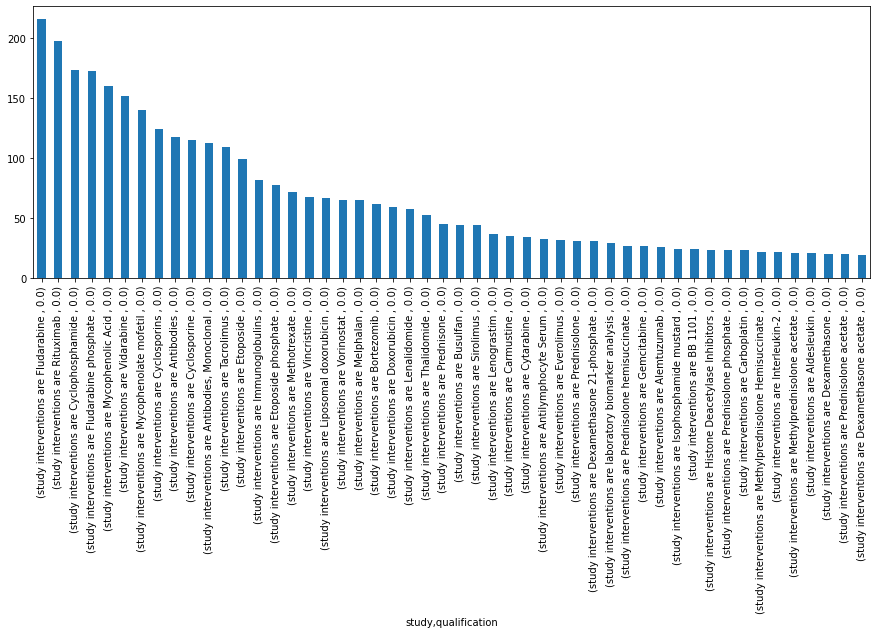

In [44]:
var_q = clintrial_lymphoma_select.groupby('study')['qualification'].value_counts().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(15,5))
var_q

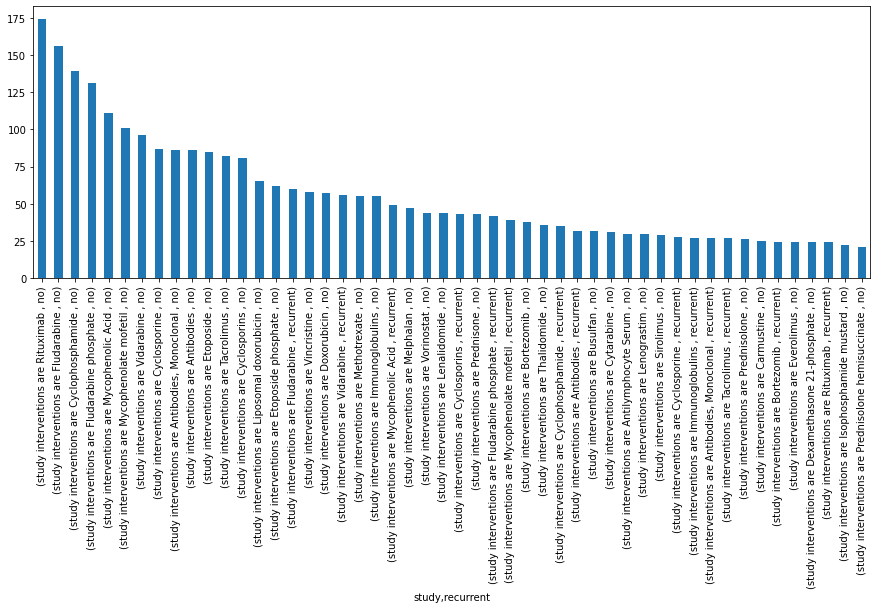

In [45]:
var_r = clintrial_lymphoma_select.groupby('study')['recurrent'].value_counts().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(15,5))
var_r

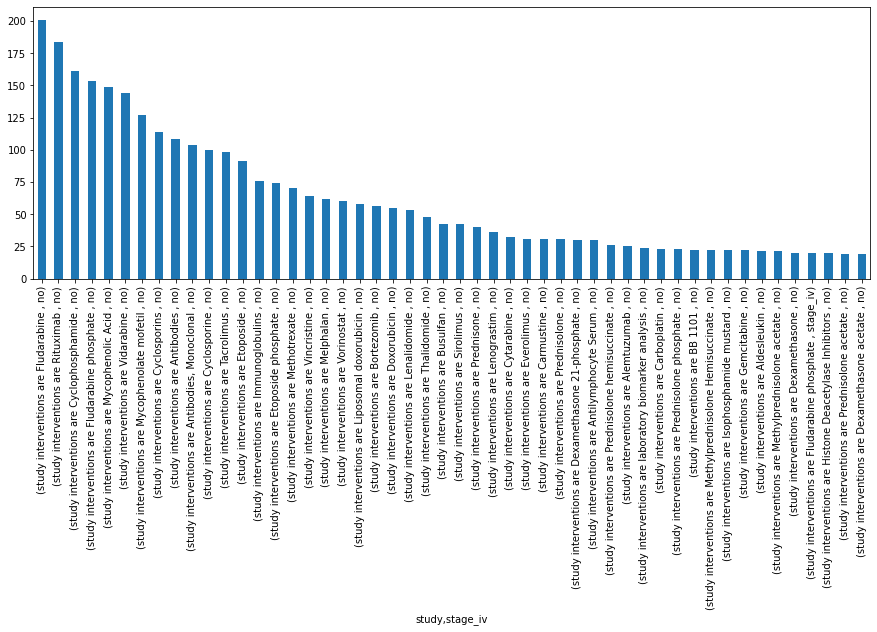

In [46]:
var_iv = clintrial_lymphoma_select.groupby('study')['stage_iv'].value_counts().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(15,5))
var_iv

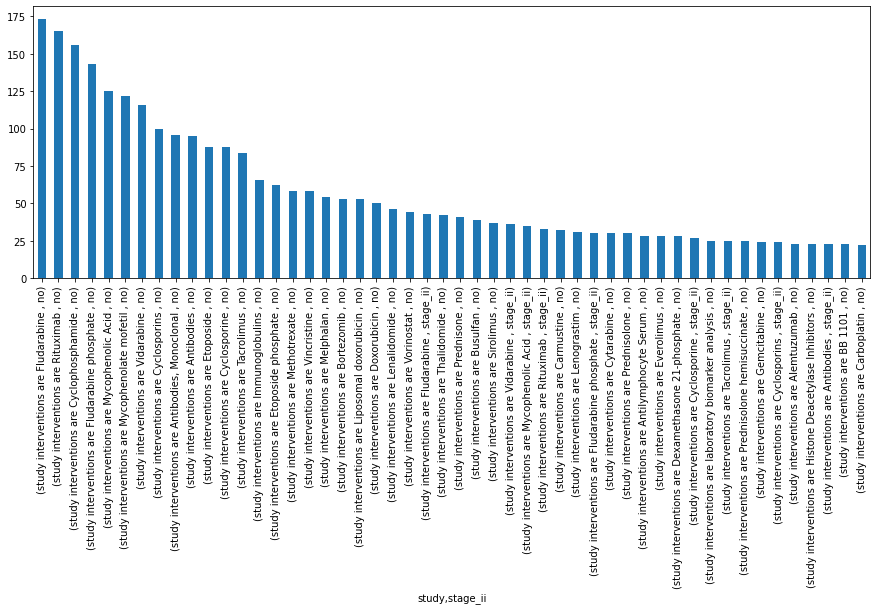

In [47]:
#Stage4 has no popular treatment 

var_ii = clintrial_lymphoma_select.groupby('study')['stage_ii'].value_counts().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(15,5))
var_ii

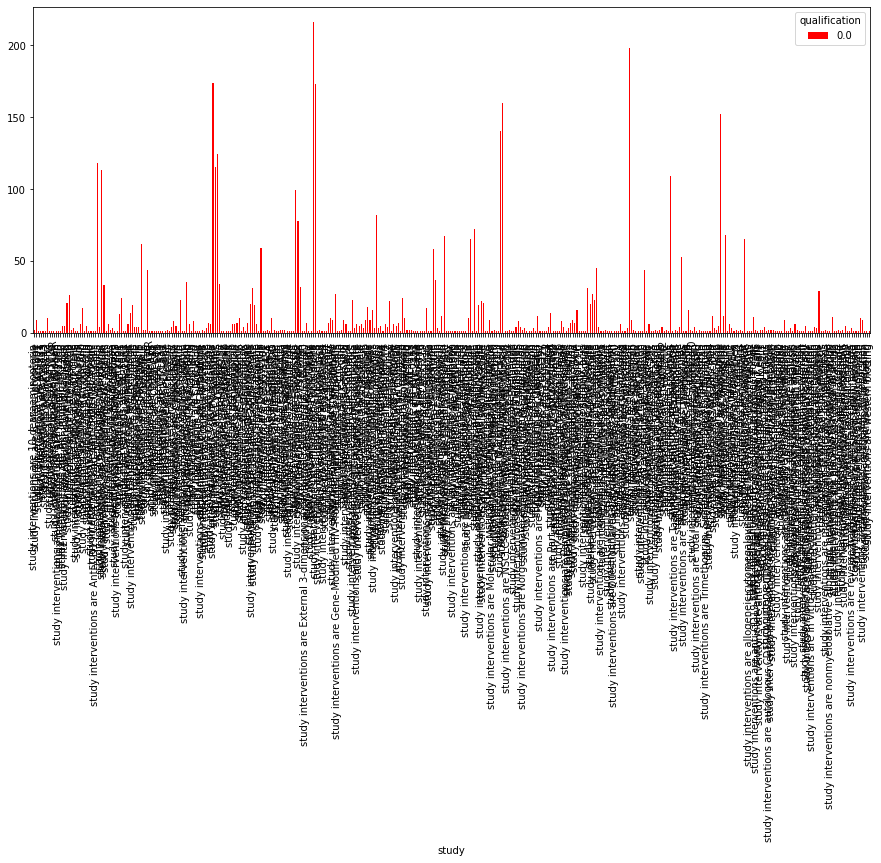

In [48]:
#Stage ii cancers have much more ways to treat

var1 = clintrial_lymphoma_select.groupby(['study']).qualification.value_counts()

var1.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], figsize=(15,6))

* With the text words, prediction based on the 'qualification' cannot be done. All the words have to be changed to number first. However as a fresher i have a little amount of knowledge in NLP.So more work need to be done on the vocabulary analysis. THANK YOU